In [10]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

#폰트 작업
import matplotlib.font_manager as fm
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
#데이터 불러오기

XR1 = pd.read_csv("1.csv",encoding='utf-8')

### 경기 데이터 
### 분석할 경기 데이터
### 12 라운드로 구성
### 선수들은 총 3개의 레벨로 나뉜다
#### XR1,XR2,XR3 (정상급 선수 ,아마추어 선수, 준아마추어 선수)
###5개의 그룹에 선수들이 무작위로 섞여 경기 진행

In [22]:
XR1.tail()

,Group 1
329,F7 김영모(XR3) 01:53.46
330,E6 최준원(XR1) 00:47.02
331,Group 5
332,E2 양우(XR2) 00:00.
333,F2 이민탁(XR3) 00:00.


# 전처리 시작

In [23]:
# 한 개의 컬럼으로 뭉쳐있는 데이터들을 "체널","이름","기록"으로 분류 하기

XR1 =XR1["Group 1"].str.split(' ',expand=True)
XR1.columns= ["체널","이름","기록"]
XR1.tail()

,체널,이름,기록
329,F7,김영모(XR3),01:53.46
330,E6,최준원(XR1),00:47.02
331,Group,5,None
332,E2,양우(XR2),00:00.
333,F2,이민탁(XR3),00:00.


In [24]:
# 기록 부분 잘못된 것 FIX

# 완주 못했을때 00:00.으로 표시해줘야하는데
# 특이 케이스 한 줄만 - 로 표시 되어있음

XR1[XR1["기록"] == "-"]

,체널,이름,기록
220,E2,김익환(XR3),-


In [25]:
# .loc 기능을 이용하여서 간단하게 변경

XR1.loc[220]["기록"] = "00:00."

In [27]:
# 체널이라는 컬럼은 기록 분석에 중요하지 않음(영상 체널을 의미한다)

XR_record = XR1.drop("체널",axis=1)

In [28]:
# 무작위로 섞여있는 각 클래스별 선수들을 나눠서 따로 프레임을 저장해준다

XR1 =XR_record[XR_record["이름"].str.contains("XR1")]
XR2 =XR_record[XR_record["이름"].str.contains("XR2")]
XR3 =XR_record[XR_record["이름"].str.contains("XR3")]

In [29]:
# 완주를 못했을때 00:00.으로 표시 된다
# 완주 못한 데이터는 확인할 필요 없으로 제거 해준다

XR1 =XR1[XR1["기록"]!="00:00."]
XR2 =(XR2[XR2["기록"]!="00:00."])
XR3 =(XR3[XR3["기록"]!="00:00."])

# 데이터 분석 

#### 완주률 분석하기

In [30]:
# 12 라운드 중 몇번 완주했는지 확인을 해볼것이다.
# 이름을 기준으로 그룹을 묶어주면 각 라운드 마다 몇번의 경기를 완주했는지 알 수 있다.

XR1_fullgame = XR1.groupby("이름").size()
XR2_fullgame= XR2.groupby("이름").size()
XR3_fullgame =XR3.groupby("이름").size()

In [36]:
#예시 

XR2_fullgame

이름
김현연(XR2)     8
양우(XR2)      4
이우진(XR2)     8
장현진(XR2)     7
정복문(XR2)    10
조완익(XR2)    10
조진국(XR2)    10
dtype: int64

In [32]:
#총 12 라운드를 진행하였음으로 완주율을 퍼센트로 보여주기 위해 완주횟수/12 를 진행해준다.

XR1_rate = XR1_fullgame/12
XR2_rate = XR2_fullgame/12
XR3_rate = XR3_fullgame/12

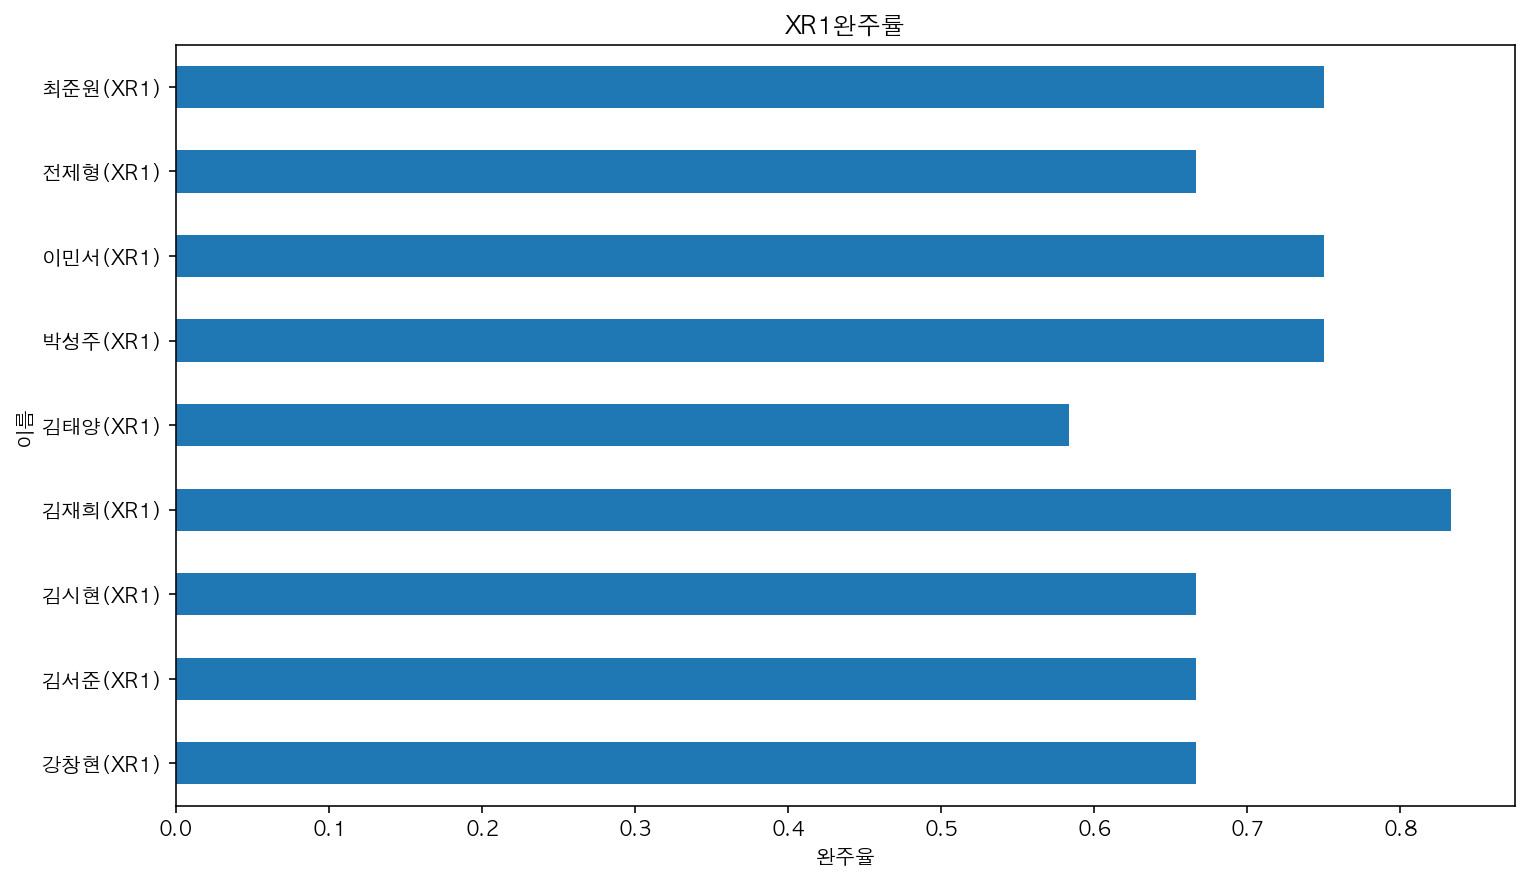

In [33]:
# XR1 완주률

plt.figure(figsize=(12, 7))
plt.title("XR1완주률")
plt.xlabel("완주율")
plt.ylabel("이름")
XR1_rate.plot(kind='barh')

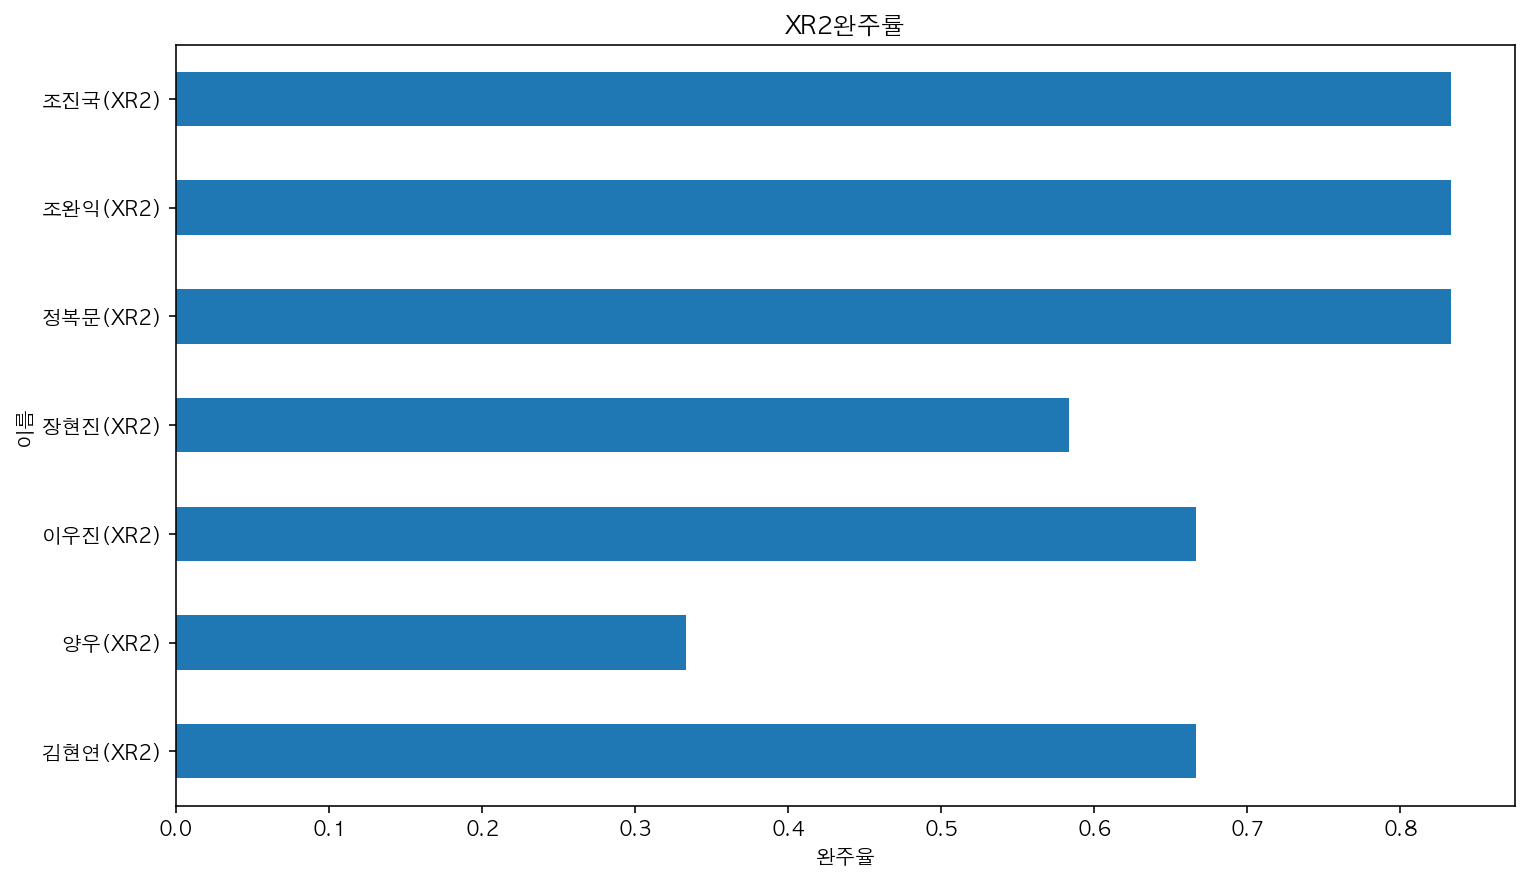

In [35]:
# XR2 완주률

plt.figure(figsize=(12, 7))
plt.title("XR2완주률")
plt.xlabel("완주율")
plt.ylabel("이름")
XR2_rate.plot(kind='barh')

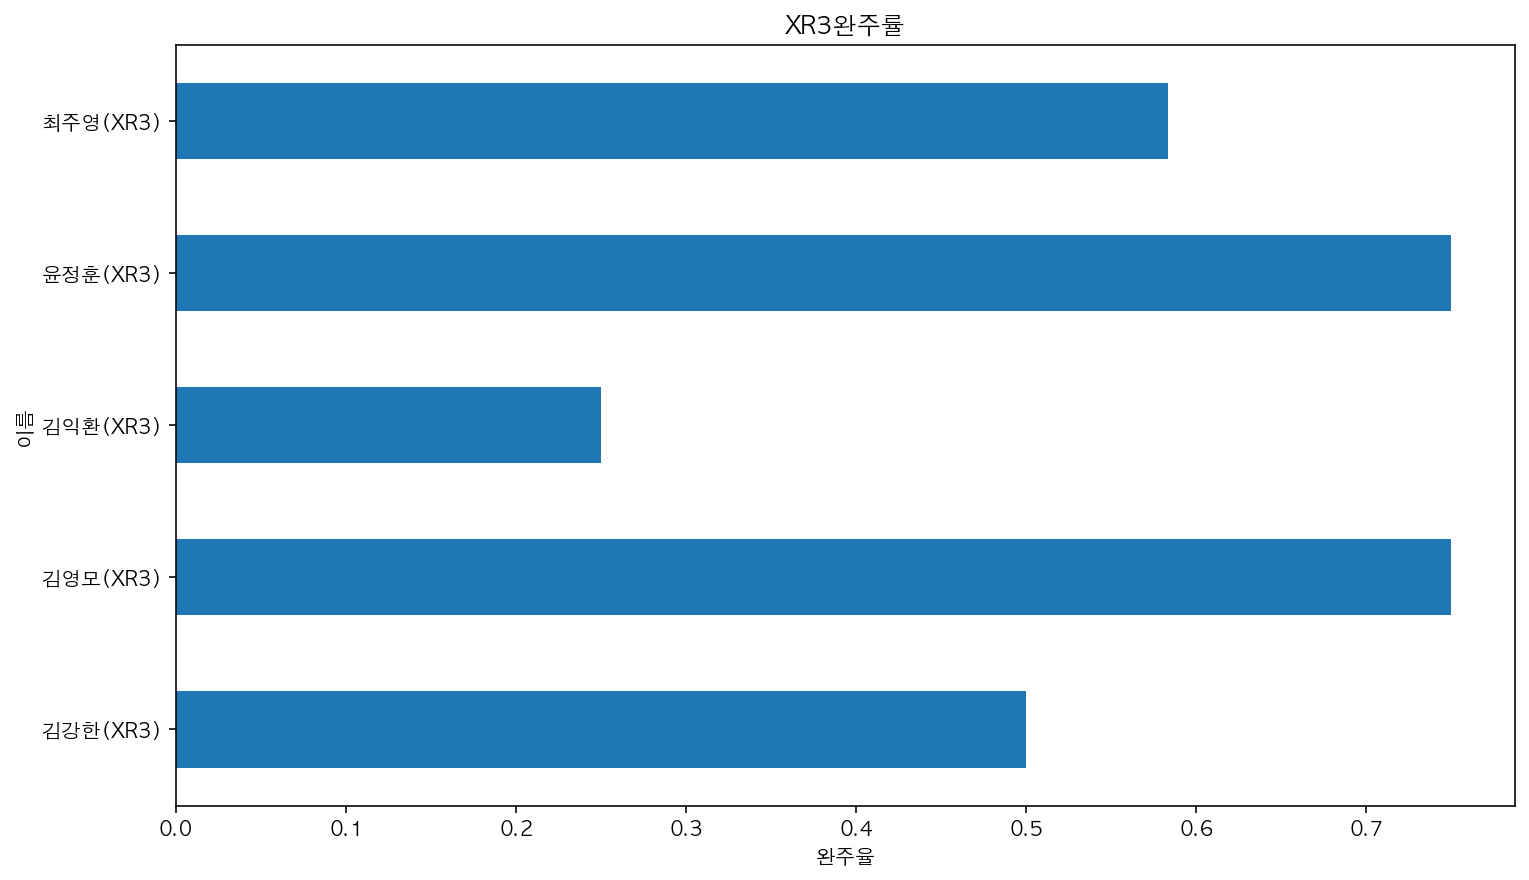

In [37]:
# XR3 완주률

plt.figure(figsize=(12, 7))
plt.title("XR3완주률")
plt.xlabel("완주율")
plt.ylabel("이름")
XR3_rate.plot(kind='barh')

## 선수들의 최고 기록 확인해보기

In [38]:
# "이름" 컬럼을 기준으로 경기데이터를 모아준 후 min() 함수 사용 최소값들을 표시해준다.
# 우리는 순위도 한 눈에 보고 싶으니 sort_values("기록") 기준으로 정렬해준다.

XR1_record = (XR1.groupby("이름").min()).sort_values("기록")
XR2_record = (XR2.groupby("이름").min()).sort_values("기록")
XR3_record = (XR3.groupby("이름").min()).sort_values("기록")

In [39]:
# XR1 클라스 친구들의 순위 및 최고 기록
XR1_record

,기록
이름,
강창현(XR1),00:34.72
박성주(XR1),00:36.45
김태양(XR1),00:38.05
김서준(XR1),00:39.3
이민서(XR1),00:39.49
최준원(XR1),00:39.5
김재희(XR1),00:42.31
김시현(XR1),00:42.75
전제형(XR1),00:43.49


In [375]:

XR2_record

,기록
이름,
김현연(XR2),00:48.42
정복문(XR2),00:50.59
이우진(XR2),00:51.39
조진국(XR2),00:52.98
장현진(XR2),00:53.07
조완익(XR2),00:53.33
양우(XR2),00:56.09


In [376]:
XR3_record

,기록
이름,
최주영(XR3),01:02.39
윤정훈(XR3),01:03.39
김강한(XR3),01:07.11
김익환(XR3),01:10.5
김영모(XR3),01:15.64
